# Title:  Stability analysis of power-law cosmological models

**Authors:**  
Jose Mathew, A. Thariq

**Affiliations:**  
Department of Physics, The Cochin College

**Abstract:**  
In this paper, we revisit the stability of power-law models, focusing on an alternative approach that differs significantly from the standard approaches used in studying power-law models. In the standard approach, stability is studied by reducing the system of background FRW equations to a one-dimensional system for a new background variable $X$ in terms of the number of e-foldings. However, we rewrote the equations, incorporating $H$ into the system and went on to do the calculations up to the second order.
We demonstrate by computing the deviations from the power-law exact solution to second-order in time and show that power-law contraction is never an attractor in time, regardless of parameter values.  Our analysis shows that while first-order corrections align with existing interpretations, second-order corrections introduce significant deviations that cannot be explained by a simple time shift that explains the first-order diverging terms. We got that the scaling solutions to be saddle-like (metastable) when evolved in time. With importance, we note that in the number of e-folds, the system remains an attractor, while in cosmic time, it is unstable. We also support our claim with numerical results. This new insight has broader implications for the study of attractor behaviour of differential equation solutions and raises questions about the stability of scenarios like the ekpyrotic bounce driven by an exponential potential. Our work also hints that the different temporal variables we use might not be equivalent in all scenarios.

---

## Differential Equations Details

We study the following system of differential equations:

\[
\begin{aligned}
\frac{dx}{dt} &= -3 x (1 - x^2) H + \frac{\sqrt{6}}{2} \lambda (x^2 - 1) H, \\
\frac{dH}{dt} &= -3 x^2 H^2,
\end{aligned}
\]

where $\lambda = -\sqrt{7}$. The system is integrated over the time interval $[t_i, -C0]$ with various initial conditions.\\
The preprint can be found at https://arxiv.org/abs/2410.18925

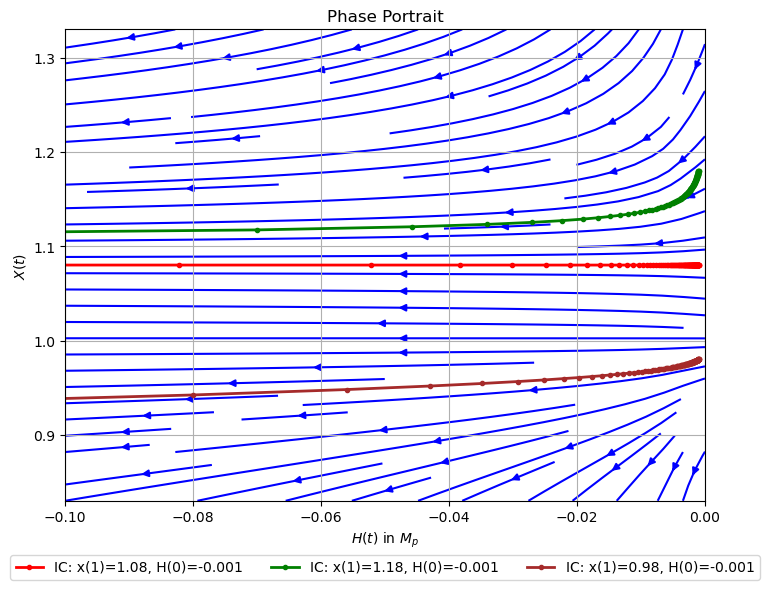

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from decimal import Decimal, getcontext

# Set precision to 20 decimal digits
getcontext().prec = 30

def ode_system(t, y, lambda_val):
    x, H = y
    dxdt = (-3 * x * (1 - x**2) + (np.sqrt(6)/2) * lambda_val * (x**2 - 1)) * H
    dHdt = -3 * x**2 * H**2
    return [dxdt, dHdt]

lambda_val = -np.sqrt(7)
C0temp = -1000.0
t_span = (1, -C0temp)
t_eval = np.linspace(t_span[0], t_span[1], 500)

initial_conditions = [
    [1.08, -0.001],
    [1.18, -0.001],
    [.98, -0.001]
]

solutions = []
for ic in initial_conditions:
    sol = solve_ivp(
        ode_system,
        t_span,
        ic,
        args=(lambda_val,),
        t_eval=t_eval,
        method='RK45',
    )
    solutions.append(sol)

plt.figure(figsize=(8, 6))

# Define grid for streamplot
H_range = np.linspace(-0.1, 0, 20)
x_range = np.linspace(initial_conditions[0][0] - 0.25, initial_conditions[0][0] + 0.25, 20)
H_grid, x_grid = np.meshgrid(H_range, x_range)

DX = (-3 * x_grid * (1 - x_grid**2) + (np.sqrt(6)/2) * lambda_val * (x_grid**2 - 1)) * H_grid
DH = -3 * x_grid**2 * H_grid**2

# Plot the streamlines in blue (with a lower zorder)
plt.streamplot(H_grid, x_grid, DH, DX, color='blue', density=1.0, arrowsize=1, zorder=1)

# Plot the solution curves in red (with a higher zorder so they appear on top)
colors = ['red', 'green', 'brown']
for i, sol in enumerate(solutions):
    x_sol = sol.y[0]
    H_sol = sol.y[1]
    plt.plot(H_sol, x_sol, color=colors[i],  lw=2, marker='o', markersize=3, label=f'IC: x(1)={sol.y[0,0]:.2f}, H(0)={sol.y[1,0]:.3f}')

plt.xlabel('$H(t)$ in $M_p$')
plt.ylabel('$X(t)$')
plt.title('Phase Portrait')
plt.xlim(-0.1, 0)
plt.ylim(initial_conditions[0][0] - 0.25, initial_conditions[0][0] + 0.25)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()

#plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\josec\Dropbox\Power_law_Inflation\figs\phase_portrait.png', dpi=300, bbox_inches='tight')
plt.show()
